### Gausss Density Estimation

모든 데이터가 하나의 가우시안(정규) 분포로부터 생성됨을 가정  
학습: 주어진 정상 데이터들을 통해 가우시안 분포의 평균 벡터와 공분산 행렬을 추정  
테스트: 새로운 데이터에 대하여 생성 확률을 구하고 이 확률이 낮을수록 이상치에 가까운 것으로 판정함  

장점
- 추정이 간단하며 학습 시간이 짧음  
- 적절한 기준치(cut-off)를 분포로부터 정할 수 있음  
- 각 변수의 측정 단위에 영향을 받지 않음

단점
- 단순한 분포에 대한 이상탐지만 가능함

관련함수  
make_blobs: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_blobs.html  
GaussianMixture: https://scikit-learn.org/dev/modules/generated/sklearn.mixture.GaussianMixture.html  

#### 1. 데이터 생성 - 정상 데이터와 이상치를 포함하는 데이터셋 생성

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# 1. 데이터 생성 - 정상 데이터와 이상치를 포함하는 데이터셋 생성
n_samples = 100
X_normal, _ = make_blobs(n_samples=n_samples, n_features= 2, centers=1, cluster_std=1.0, random_state=42)
outliers = np.random.uniform(low=-10, high=10, size=(20, 2)) # 이상치 생성
X = np.vstack([X_normal, outliers])
print(X.shape)
plt.scatter(X[:,0],X[:,1])


#### 2. GMM 모델 학습 & 3. 이상치 점수 계산

In [ ]:
# 2. GMM 모델 학습
n_components = 1 # 가우시안 분포 수 (단일 클러스터로 가정)
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(X)

# 3. 이상치 점수 계산
log_likelihood = gmm.score_samples(X)  # 적합된 가우시안 확률밀도함수를 통해 각 점의 확률을 구하고 log를 취한 값
print(log_likelihood)
threshold = np.percentile(log_likelihood, 15/120*100) # 하위 5%를 이상치로 간주
print("threshold:", threshold)
outliers = X[log_likelihood < threshold]
normal_data = X[log_likelihood >= threshold]

In [ ]:
# 4. 시각화
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], label='Norm,', c='blue')
plt.scatter(outliers[:, 0], outliers[:, 1], label='Anom.', c='red', s=40)
plt.title('GMM-Based Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### 실습1: 정상 데이터가 산포되어 있는 경우에 대한 Gaussian Density Estimation의 적용

In [ ]:
# 1. 데이터 생성 - 정상 데이터와 이상치를 포함하는 데이터셋 생성
n_samples = 200
centers = [[-5, -5], [0, -7], [5, 5], [10, 0]]  # 클러스터 중심 설정
X_normal, _ = make_blobs(n_samples=n_samples, n_features= 2, centers=centers, cluster_std=1.0, random_state=42)
outliers = np.random.uniform(low=-10, high=10, size=(20, 2)) # 이상치 생성
X = np.vstack([X_normal, outliers])
plt.scatter(X[:,0], X[:,1])
plt.show()

################################################
############        실습1-시작        ###########
################################################
# 2. Gaussian model 학습




# 3. 이상치 계산




# 4. 시각화



################################################
############        실습1-종료        ###########
################################################


### Mixture of Gaussian Density Estimation

기존 Gaussian Density Estimation이 데이터 분포에 대해 매우 강한 가정 (Unimodal Gaussian)을 가지고 있음.   
MOG는 여러개의 가우시안 분포의 선형 결합으로 이루어져 복잡도가 높은 데이터에 대해서도 이상탐지가 가능함. 


In [ ]:
# 데이터 생성
X, _ = make_blobs(n_samples=500, centers=2, cluster_std=1.0, random_state=42)
outliers = np.random.uniform(low=-10, high=10, size=(20, 2))  # 임의의 이상치 생성
X = np.vstack([X, outliers])
plt.scatter(X[:, 0], X[:, 1], c='blue', s=20, label='Norm.')


In [ ]:
n_components = 1  # 가우시안 구성 요소 수
gmm1 = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm1.fit(X)

n_components = 2  # 가우시안 구성 요소 수
gmm2 = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm2.fit(X)

log_likelihood = gmm1.score_samples(X)
threshold = np.percentile(log_likelihood, 5)  # 하위 5%를 이상치로 설정
outliers1 = X[log_likelihood < threshold]
normal_data1 = X[log_likelihood >= threshold]

log_likelihood = gmm2.score_samples(X)
threshold = np.percentile(log_likelihood, 5)  # 하위 5%를 이상치로 설정
outliers2 = X[log_likelihood < threshold]
normal_data2 = X[log_likelihood >= threshold]

# 시각화
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(normal_data1[:, 0], normal_data1[:, 1], c='blue', s=20, label='Norm.')
plt.scatter(outliers1[:, 0], outliers1[:, 1], c='red', s=40, label='Anom.')
plt.title('Anomaly Detection using Gaussian Density')
plt.subplot(122)
plt.scatter(normal_data2[:, 0], normal_data2[:, 1], c='blue', s=20, label='Norm.')
plt.scatter(outliers2[:, 0], outliers2[:, 1], c='red', s=40, label='Anom.')
plt.title('Anomaly Detection using MoG')


### 실습2. 정상 데이터만 가지고 비정상 데이터 탐지 

기존 Gaussian Density Estimation이 데이터 분포에 대해 매우 강한 가정 (Unimodal Gaussian)을 가지고 있음.   
MOG는 여러개의 가우시안 분포의 선형 결합으로 이루어져 복잡도가 높은 데이터에 대해서도 이상탐지가 가능함. 


In [ ]:
# 초기 정상 데이터
n_samples = 500
centers = [[-5, -5], [0, 0], [5, 5], [10, 0]]  # 클러스터 중심 설정

# 테스트 데이터 (정상 + 이상치)
X, _ = make_blobs(n_samples=200, centers=centers, cluster_std=1.0, random_state=101)  # 정상 데이터
test_outliers = np.random.uniform(low=-10, high=15, size=(20, 2))  # 이상치 데이터
test_data = np.vstack([X, test_outliers])
test_labels = np.hstack([np.ones(len(X)), -1 * np.ones(len(test_outliers))])  # 1: 정상, -1: 이상치
print(test_data.shape, test_labels.shape)
print(test_labels)
plt.scatter(X[:,0],X[:,1])


In [ ]:
################################################
###########        실습2-1-시작        ##########
################################################
#1. Mixture of Gaussian model 적용
#Input : X (정상 데이터)
#Output : gmm (GaussianMxiture model)




################################################
###########        실습2-1-종료        ##########
################################################

In [ ]:
# 입력데이터에 대한 log_likelihood 계산 및 histogram 출력
# 정상상 데이터에 대한 log-likelihood 계산
original_log_likelihood = gmm.score_samples(X) 

# 통계 값 계산
log_likelihood_mean = np.mean(original_log_likelihood)
log_likelihood_std = np.std(original_log_likelihood)
log_likelihood_min = np.min(original_log_likelihood)
log_likelihood_max = np.max(original_log_likelihood)

# 통계 값 출력
print("Mean:", log_likelihood_mean, "Standard Deviation:", log_likelihood_std, "Min:", log_likelihood_min,  "Max:", log_likelihood_max)

# 히스토그램 시각화
plt.figure(figsize=(8, 6))
plt.hist(original_log_likelihood, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of Log-Likelihood (Original Data)")
plt.xlabel("Log-Likelihood")
plt.ylabel("Frequency") 
plt.show()


In [ ]:
################################################
###########        실습2-2-시작        ##########
################################################
# GMM 이상치 판별 (Histogram 기반 log-likelihood 기준 값을 바탕으로 정상과 비정상을 구분)
# Input: gmm (학습된 gaussianmixture model), test_data (정상 및 이상치를 같이 가지고 있는 데이터)
# Output: gmm_predictions (이상치면 -1, 정상면 1의 값을 가지게 구현 (np.where 사용))
# e.g) np.where(array 조건문, -1, 1) , array의 각 항별로 조건문을 만족하면 -1, 조건문을 만족하지 못하면 1을 가지는 배열 출력









################################################
###########        실습2-2-종료        ##########
################################################

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(test_data[test_labels == 1][:, 0], test_data[test_labels == 1][:, 1], c='blue', s=20, label='Original Normal')
plt.scatter(test_data[test_labels == -1][:, 0], test_data[test_labels == -1][:, 1], c='red', s=40, label='Additional Data')
plt.scatter(test_data[gmm_predictions == -1][:, 0], test_data[gmm_predictions == -1][:, 1], edgecolor='black', facecolors='none', label='Predicted Outlier (GMM)', linewidth=1.5)
plt.title('GMM Anomaly Detection (Threshold Based)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()


### 밀도 기반 이상이 탐지 기법 Local outlier factor (LOF)

이상치 스코어를 주변부 데이터의 밀도를 고려하여 할당함.  
Definition1: k-distance of an object p, p 주변의 가까운 k개의 데이터를 뽑았을 떄 최대거리 (k-distance)  
Definition2: k-distance neighbordhood of an object p , 위의 최대 거리 (k-distance) 포함 내부에 있는 점들의 집합  
Definition3: reachability distance, 가까운 객체는 k-distance를 먼 객체는 객체간의 거리 값을 가짐.  
Definition4: local reachability density of an object p, p 근처에 밀집하면 큰 값을 가지고, p 근처에 성기면 작은 값을 가짐.  
Definition5: local outlier factor of an object p, p 근처가 데이터가 없는데, 그나마 가까운 데이터들의 경우에는 주변에 데이터가 많은 경우 높은 값을 가짐.  




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor

# 데이터 생성
X, _ = make_blobs(n_samples=500, centers=2, cluster_std=1.0, random_state=42)
outliers = np.random.uniform(low=-10, high=10, size=(20, 2))  # 임의의 이상치 생성
X = np.vstack([X, outliers])

# LOF 기반 이상 탐지, contamination은 데이터에서 이상치로 간주할 비율
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_labels = lof.fit_predict(X)
lof_outliers = X[lof_labels == -1]
lof_normal_data = X[lof_labels == 1]

# LOF 결과 시각화
plt.scatter(lof_normal_data[:, 0], lof_normal_data[:, 1], c='blue', s=20, label='Normal (LOF)')
plt.scatter(lof_outliers[:, 0], lof_outliers[:, 1], c='red', s=40, label='Anomaly (LOF)')
plt.title('Anomaly Detection using LOF')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



### 모델 기반 이상치 탐지 기법: Isolation Forest

소수 범주(이상치)는 개체수가 적어 Tree 기반으로 고립 시키는데 적은 분기만으로 가능. 




In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 데이터 생성: 클러스터 2개와 이상치 추가
X, _ = make_blobs(n_samples=500, centers=2, cluster_std=1.0, random_state=42)
outliers = np.random.uniform(low=-10, high=10, size=(20, 2))  # 임의의 이상치 생성
X = np.vstack([X, outliers])

# Isolation Forest 모델 정의 및 학습
isolation_forest = IsolationForest(n_estimators=100, contamination=0.04, random_state=42)  # 약 4% 이상치
isolation_forest.fit(X)
predictions = isolation_forest.predict(X)  # 1: 정상, -1: 이상치
if_outliers = X[predictions == -1]
if_normal_data = X[predictions == 1]

# Isolation Forest 결과 시각화
plt.scatter(if_normal_data[:, 0], if_normal_data[:, 1], c='blue', s=20, 
label='Normal (IF)')
plt.scatter(if_outliers [:, 0], if_outliers [:, 1], c='red', s=40, 
label='Anomaly (IF)')
plt.title('Anomaly Detection using IF')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### 모델 기반 이상치 탐지 기법: 1-SVM/SVDD

정상 데이터를 최대한 분리(혹은 밀폐)하는 초평면(Hyperplane) 또는 구(sphere) 을 정의하여 이상치를 탐지함.


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 데이터 생성: 클러스터 2개와 이상치 추가
X, _ = make_blobs(n_samples=500, centers=2, cluster_std=1.0, random_state=42)
outliers = np.random.uniform(low=-10, high=10, size=(20, 2))  # 임의의 이상치 생성
X = np.vstack([X, outliers])

# One-Class SVM 모델 정의 및 학습
oc_svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)  # 약 5% 이상치
oc_svm.fit(X)  # 정상 데이터로 모델 학습

# 전체 데이터에 대한 예측
predictions = oc_svm.predict(X)  # 1: 정상, -1: 이상치
svm_outliers = X[predictions == -1]
svm_normal_data = X[predictions == 1]

# One-Class SVM 결과 시각화
plt.scatter(svm_normal_data[:, 0], svm_normal_data[:, 1], 
c='blue', s=20, label='Normal (1-SVM)')
plt.scatter(svm_outliers[:, 0], svm_outliers[:, 1], c='red',s=40, label='Anomaly (1-SVM)')
plt.title('Anomaly Detection using 1-SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### 재구축 오차 기반 이상치 탐지 기법: Autoencoder

Autoencoder: 입력과 출력이 동일한 인공신경망 구조  
autoencoder는 입력과 출력이 동일하므로 학습을 통해 입력을 받으면 동일한 출력을 재구축하는 기능을 가짐.  
1. Autoencoder를 정상 데이터만 가지고 학습하여 정상 데이터에 대한 재구축 능력을 학습.
2. 정상 데이터를 autoencoder에 입력하면 성공적으로 재구축 된 이미지 생성
3. 비정상 데이터를 autoencoder에 입력하면 재구축이 제대로 이루어지 않아,  
   입력이미지와 출력이미지 간에 큰 차이가 발생함.  
4. 위의 특성을 이용해서 autoencoder의 입력과 출력 사이의 차이를 계산하고,  
   차이가 작으면 정상, 차이가 크면 비정상으로 분류

MinMaxScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 데이터 생성: 여러 개의 클러스터 중심을 가지는 데이터셋
n_samples = 500
X, _ = make_blobs(n_samples=500, centers=2, cluster_std=1.0, random_state=42)
test_outliers = np.random.uniform(low=-10, high=10, size=(20, 2))  # 임의의 이상치 생성
test_data = np.vstack([X, test_outliers])
test_labels = np.hstack([np.ones(len(X)), -1 * np.ones(len(test_outliers))])  # 1: 정상, -1: 이상치

# 데이터 정규화
scaler = MinMaxScaler() # 0~1 까지의 범위로 변환환
X_scaled = scaler.fit_transform(X) #정상 데이터로만 구성되어 있음. 
#MinMaxScaler() 처음 접합할때는 fit_transform, 이후에는 transform, 다시 원복 할 떄는 inverse_transform
test_data_scaled = scaler.transform(test_data) 
print(X[:5])
print(X_scaled[:5])

# DataLoader 생성 (Batch 학습을 위해 필요함)
# numpy array --> torch.tensor --> Dataloader (배치학습 용)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
# 테스트 데이터 Tensor 변환
test_data_tensor = torch.tensor(test_data_scaled, dtype=torch.float32)

### Autoencoder model

Autoencoder model의 아래와 같은 순서로 구성되어 있음.  
- Input data (2 features)  
- Encoder (linear (2, 32) -> ReLU -> linear(32, 2))  
- Latent space (2 features)  
- Decoder (linear (2, 32) -> ReLU -> linear(32, 2))  
- Output data (2 features)  

Autoencoder 학습  
- Input data와 output data의 MSE를 Loss로 활용  
  (입력 데이터를 얼머나 잘 재구축하였는지를 평가)

In [6]:
# PyTorch 모델 정의 (Autoencoder)
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, encoding_dim),            
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim),            
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    

input_dim = X_scaled.shape[1] # x_scaled 의 (500,2) 이므로 두번째 차원의 크기는 2이고, input_dim = 2가 됨.

encoding_dim = 2  # 축소된 차원
autoencoder = Autoencoder(input_dim, encoding_dim)

# 모델 컴파일 (Optimizer 및 Loss 설정)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

In [ ]:
# Autoencoder 학습
num_epochs = 200

for epoch in range(num_epochs):
    for dataset in dataloader:        
        batch_X = dataset[0]
        # Forward pass        
        outputs = autoencoder(batch_X)
        loss = criterion(outputs, batch_X)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


In [ ]:
# 재구성 오차 계산
with torch.no_grad():
    reconstructed_data = autoencoder(X_tensor).numpy()
reconstruction_errors = np.mean(np.square(X_scaled - reconstructed_data), axis=1)

print("Normal max MSE :",np.max(reconstruction_errors))
print("Normal mean MSE:",np.mean(reconstruction_errors))

# 재구성 오차 계산
with torch.no_grad():
    reconstructed_data = autoencoder(test_data_tensor).numpy()
reconstruction_errors = np.mean(np.square(test_data_scaled - reconstructed_data), axis=1)

# 이상치 판별 (재구성 오차 기준)
#error_threshold = np.percentile(reconstruction_errors[:len(test_data_scaled)], 95)  # 정상 데이터의 상위 5% 기준
error_threshold = 4.57285640121461e-07 # 정상 데이터의 통계적 특성을 보고 선정
autoencoder_predictions = np.where(reconstruction_errors > error_threshold, -1, 1)  # -1: 이상치, 1: 정상

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(test_data[test_labels == 1][:, 0], test_data[test_labels == 1][:, 1], c='blue', s=20, label='True Normal')
plt.scatter(test_data[test_labels == -1][:, 0], test_data[test_labels == -1][:, 1], c='red', s=40, label='True Outlier')
plt.scatter(test_data[autoencoder_predictions == -1][:, 0], test_data[autoencoder_predictions == -1][:, 1], edgecolor='black', facecolors='none', label='Predicted Outlier', linewidth=1.5)
plt.title('Autoencoder Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()


### 실습3. Credit card farud transaction 이상탐지 예제

이 데이터셋은 2013년 9월에 유럽 카드 소지자들이 수행한 거래를 포함하고 있음.  
이 데이터셋은 이틀 동안 발생한 거래를 보여주며, 284,807건의 거래 중 492건이 사기임.  
데이터셋은 매우 불균형하며, 양성 클래스(사기 거래)는 전체 거래의 0.172%를 차지합니다.  
이 데이터셋에는 PCA 변환의 결과인 숫자형 입력 변수만 포함되어 있음.  
불행히도 기밀 문제로 인해 원본 특성 및 데이터에 대한 더 많은 배경 정보를 제공할 수 없음.  
V1, V2, … V28은 PCA를 통해 얻어진 주요 성분이며, 'Time'과 'Amount' 특성만 PCA로 변환되지 않았음.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('./data/creditcard.csv')

# null 값 체크
print("Null check1:", data.isnull().sum().max())
print("Null check2:", data.isnull().values.any())

print(data)

In [41]:
# 데이터 전처리, Time 은 결제 시간으로 의미없는 데이터라 제거
data = data.drop(['Time', 'Amount'], axis= 1)

In [ ]:
# 단순한 data의 불균형을 보여주는 결과
LABELS = ["Non-Fraud", "Fraud"]
num_nonfraud = np.sum(data['Class'] == 0)
num_fraud = np.sum(data['Class'] == 1)

plt.bar(['Fraud', 'Non-Fraud'], [num_fraud, num_nonfraud], color=['red', 'lightgrey'])
plt.title('Class Distribution \n (0 : Non-Fraud / 1 : Fraud)', fontsize=13)
plt.xlabel("Class")
plt.ylabel("Frequency");
# 막대 그래프 위에 수치 표시
for i, value in enumerate([num_fraud, num_nonfraud]):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=11, fontweight='bold')

data.describe()

### Data imbalance 해소법
Data의 극심한 불균형이 있을 때는 data imbalance를 해소하기 위해,  
(1) data downsampling  
(2) data upsampling (data augmentation)  
을 수행하여 정확도를 높이는 경우가 많다.   

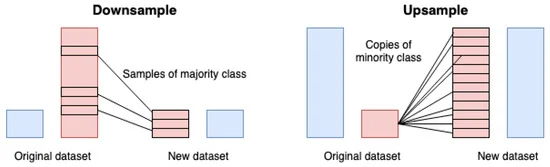

(1) Data downsampling은 정상 데이터의 일부를 가져와서 모델을 만들고,  
bagging 같은 emsemble 모델을 도입하는 것이 좋은 방법 중 하나임.  

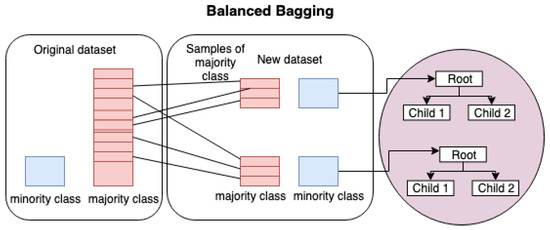

(2) Data upsamping (data augmentation) 은 단순하게는 Noise 추가, 더 나아가서는 SMOTE, GAN, VAE 등이 있음.   

출처: Educ. Sci. 2019, 9(4), 275

아래는 bagging 없는 data downsampling의 예제임.  
dataframe sample : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html


In [ ]:
non_fraud = data[data['Class'] == 0].sample(4500)
fraud = data[data['Class'] == 1]

df = pd.concat([non_fraud, fraud]).sample(frac=1).reset_index(drop=True)

X_normal = non_fraud.drop(['Class'], axis = 1).values
Y_normal = non_fraud['Class'].values

X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

X_full = data.drop(['Class'], axis = 1).values
Y_full = data["Class"].values

print(X_normal.shape, Y_normal.shape)
print(X.shape, Y.shape)
print(X_full.shape, Y_full.shape)

Input의 차원이 30차원으로 일반적인 방법으로는 가시화가 어렵고,   
높은 차원(30차원)의 데이터를 낮은 차원(2차원)으로 mapping하여 가시화 방법으로 PCA, tsne가 있음.    
아래는 TSNE를 사용하여 입력 데이터를 가시화 하는 코드임.  
TSNE : https://scikit-learn.org/1.5/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
from sklearn.manifold import TSNE

def tsne_plot(x1, y1):
    tsne = TSNE(n_components=2, random_state=42,max_iter=1000)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.show();

tsne_plot(X, Y)

이상탐지 알고리즘 적용
1. Mixture of Gaussian
2. Local Outlier Factor (LOF)
3. Isolation Forest (IF)
4. Autoencoder (AE)

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


################################################
###########        실습3-1-시작        ##########
################################################
# 입력: X_normal (정상데이터셋), X (정상, 비정상 합친 데이터셋)
# 출력: predictions (X데이터셋에 대해서 이상치는 1, 정상은 0의 값을 가지는 배열)

# GMM 모델 학습


# 데이터의 로그 확률 점수 계산 (log-likelihood)



# 이상치 판단 기준 설정



################################################
###########        실습3-1-종료        ##########
################################################




In [ ]:
# Confusion Matrix 생성
cm = confusion_matrix(Y, predictions)

# Confusion Matrix 출력
print("Confusion Matrix:")
print(cm)

# Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for GMM")
plt.show()

# 평가 지표 출력 (Y는 실제 레이블, predictions는 GMM 결과)
print("Classification Report:")
print(classification_report(Y, predictions, target_names=['Non-Fraud', 'Fraud']))

2. Local outlier factor (LOF)

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

#Lof 기반 이상탐지
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# LOF로 이상치 탐지 (-1: 이상치, 1: 정상치)
y_pred_lof = lof.fit_predict(X)

# LOF 결과를 0/1로 변환 (-1 -> 1 (이상치), 1 -> 0 (정상치))
y_pred = np.where(y_pred_lof == -1, 1, 0)

# Confusion Matrix 생성
cm = confusion_matrix(Y, y_pred)

# Confusion Matrix 출력
print("Confusion Matrix:")
print(cm)

# Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for LOF")
plt.show()

# Classification Report 출력
print("Classification Report:")
print(classification_report(Y, y_pred, target_names=['Non-Fraud', 'Fraud']))


3. Isolation forest

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Isolation Forest 모델 초기화
# https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.IsolationForest.html
iso_forest = IsolationForest(n_estimators=100, contamination=0.09, random_state=42)

# 모델 학습 및 예측 (-1: 이상치, 1: 정상치)
iso_forest.fit(X)
y_pred_iso = iso_forest.predict(X)

# 예측 결과를 0/1로 변환 (-1 -> 1 (이상치), 1 -> 0 (정상치))
y_pred = np.where(y_pred_iso == -1, 1, 0)

# Confusion Matrix 생성
cm = confusion_matrix(Y, y_pred)

# Confusion Matrix 출력
print("Confusion Matrix:")
print(cm)

# Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for LOF")
plt.show()

# Classification Report 출력
print("Classification Report:")
print(classification_report(Y, y_pred, target_names=['Non-Fraud', 'Fraud']))


4. Autoencoder 기반 이상 탐지 실습

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 초기화
scaler = MinMaxScaler()

non_fraud = data[data['Class'] == 0].sample(4500)
fraud = data[data['Class'] == 1]

df = pd.concat([non_fraud, fraud]).sample(frac=1).reset_index(drop=True)

# Non-Fraud 데이터만 학습용으로 사용
X_train = non_fraud.drop(['Class'], axis=1).values
X_train = scaler.fit_transform(X_train)  # 학습 데이터 스케 일링
X_train = torch.tensor(X_train, dtype=torch.float32)

# 테스트 데이터는 전체 데이터 사용
X_test = df.drop(['Class'], axis=1).values
X_test = scaler.transform(X_test)  # 테스트 데이터 스케일링
Y_test = df['Class'].values
X_test = torch.tensor(X_test, dtype=torch.float32)

################################################
###########        실습3-2-시작        ##########
################################################
# Autoencoder class 정의 구조 정의
# input : input_dim, encoding_dim은 autoencoder class의 __init__ 함수의 입력 인자로 활용
# output: class Autoencoder 정의










################################################
###########        실습3-2-종료        ##########
################################################

autoencoder = Autoencoder(input_dim = X.shape[1], encoding_dim = 8)
# Autoencoder 학습
num_epochs = 200

# 모델 컴파일 (Optimizer 및 Loss 설정)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
autoencoder.train()
for epoch in range(num_epochs):
    # Backward pass and optimization
    optimizer.zero_grad()

    # Forward pass        
    outputs = autoencoder(X_train)
    loss = criterion(outputs, X_train)
    
    loss.backward()
    optimizer.step()
    # Log training progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss:.4f}")



In [ ]:
################################################
###########        실습3-3-시작        ##########
################################################
# 재구성 오차 계산
# input: 학습된 autoencoder, X_train (정상 데이터), X_test (정상, 비정상 데이터)
# output: threshold, 판정 기준 값값









################################################
###########        실습3-3-종료        ##########
################################################


print(f"Reconstruction error threshold: {threshold}")

X_test_pred = autoencoder(X_test)
test_mse = np.mean(np.square(X_test.detach().numpy() - X_test_pred.detach().numpy()), axis=1)

# 테스트 데이터 이상치 예측
y_pred = np.where(test_mse > threshold, 1, 0)  # 1: 이상치, 0: 정상치

# Confusion Matrix 생성
cm = confusion_matrix(Y_test, y_pred)

# Confusion Matrix 출력
print("Confusion Matrix:")
print(cm)

# Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Autoencoder")
plt.show()

# Classification Report 출력
print("Classification Report:")
print(classification_report(Y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))


### Deep-SVDD 코드구현
 - 가장 단순한 형태의 Deep-SVDD   
1. Network를 통한 데이터 mapping   
2. 임의의 center (c)와 mapping 된 점들의 거리를 최소화하게 학습    
3. test_data를 Network를 통해 mapping하고, 이를 center (c)와의 거리를 비교하여,  
   가까우면 정상, 거리가 멀면 비정상으로 판별  


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
import random

# 데이터 생성: 여러 개의 클러스터 중심을 가지는 데이터셋
n_samples = 500
X, _ = make_blobs(n_samples=500, centers=2, cluster_std=1.0, random_state=42)
test_outliers = np.random.uniform(low=-10, high=10, size=(20, 2))  # 임의의 이상치 생성
test_data = np.vstack([X, test_outliers])
test_labels = np.hstack([np.ones(len(X))*-1, np.ones(len(test_outliers))])  # 0: 정상, 1: 이상치

# 데이터 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) #정상 데이터로만 구성되어 있음.
test_data_scaled = scaler.transform(test_data) 

# DataLoader 생성
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
Y = np.ones(len(X))*-1
Y_tensor = torch.tensor(Y, dtype=torch.int)
dataset = TensorDataset(X_tensor, Y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
# 테스트 데이터 Tensor 변환
test_data_tensor = torch.tensor(test_data_scaled, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.int)
dataset_test = TensorDataset(test_data_tensor, test_labels_tensor)
dataloader_test = DataLoader(dataset_test, batch_size=64, shuffle=True)

# Define Network for mapping
class network(nn.Module):
    def __init__(self, input_dim=2, z_dim=2):
        super(network, self).__init__()               
        # Encoder
        self.encoder_fc1 = nn.Linear(input_dim, 16)
        self.encoder_fc2 = nn.Linear(16, 16)
        self.encoder_fc3 = nn.Linear(16, z_dim)

    def forward(self, x):
        x = F.relu(self.encoder_fc1(x))
        x = F.relu(self.encoder_fc2(x))        
        x = self.encoder_fc3(x)  # No activation here for latent representation
        return x
    
# Initialize Network and variables
latent_dim = 2
network = network(input_dim = 2, z_dim=2)

# Initialize center c
with torch.no_grad():
    initial_latent = network(X_tensor)
    c = torch.mean(initial_latent, dim=0)  # Compute initial center
    print("Center:", c)


# Define optimizer and hyperparameters
optimizer = optim.Adam(network.parameters(), lr=0.001)
num_epochs = 1000
lambda_reg = 1e-3 # Regularization parameter for weights

# Deep SVDD training
network.train()
for epoch in range(num_epochs):    
    total_loss = 0
    for x, y in dataloader:
        x = x.float()
        optimizer.zero_grad()
        # Forward pass
        latent = network(x)
        # Loss: Center Loss
        loss = torch.mean(torch.norm(latent - c, dim=1))        
        #center_loss = torch.mean(torch.norm(latent - c, dim=1))
        #regularization_loss = lambda_reg * sum(torch.norm(param) ** 2 for param in network.parameters())
        #loss = center_loss + regularization_loss
        
        # Backpropagation
        loss.backward()
        optimizer.step()

        total_loss += loss.item()    
    # Log training progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss/len(dataloader):.4f}")

# Evaluate Deep SVDD
network.eval()

with torch.no_grad():
    z = network(test_data_tensor)
    scores = torch.sum((z - c) ** 2, dim=1)
scores = scores.numpy()

predictions = (scores > np.quantile(scores, 0.95)).astype(int)


# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(test_data[test_labels == -1][:, 0], test_data[test_labels == -1][:, 1], c='blue', s=20, label='True Normal')
plt.scatter(test_data[test_labels == 1][:, 0], test_data[test_labels == 1][:, 1], c='red', s=40, label='True Outlier')
plt.scatter(test_data[predictions == 1][:, 0], test_data[predictions == 1][:, 1], edgecolor='black', facecolors='none', label='Predicted Outlier', linewidth=1.5)
plt.title('Deep-SVDD Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()




### Neural network를 통한 Mapping 결과
최초 두 개의 center를 갖는 정상 데이터를 하나의 원에 정상 데이터가 모이도록 정상 데이터를 neural network가 mapping 함.  
하나의 원 중심을 기준으로 거리가 멀면 비정상 데이터로 가까우면 정상 데이터로 판정함.   

In [ ]:
# Evaluate Deep SVDD
network.eval()
with torch.no_grad():
    z = network(test_data_tensor)
    scores = torch.sum((z - c) ** 2, dim=1)
test_data_mapping = z.numpy()
scores = scores.numpy()
predictions = (scores > np.quantile(scores, 0.95)).astype(int)
radius = np.sqrt(np.quantile(scores, 0.95))
center = c.numpy()
print("Center, Radius:", center, radius)
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(test_data_mapping[test_labels == 0][:, 0], test_data_mapping[test_labels == 0][:, 1], c='blue', s=20, label='True Normal')
plt.scatter(test_data_mapping[test_labels == 1][:, 0], test_data_mapping[test_labels == 1][:, 1], c='red', s=40, label='True Outlier')
plt.scatter(test_data_mapping[predictions == 1][:, 0], test_data_mapping[predictions == 1][:, 1], edgecolor='black', facecolors='none', label='Predicted Outlier', linewidth=1.5)
plt.title('Deep-SVDD Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.figure(figsize=(8, 6))
a = plt.axes(xlim=(center[0]-radius*4, center[0]+radius*4), ylim=(center[1]-radius*4, center[1]+radius*4))
plt.scatter(test_data_mapping[test_labels == 0][:, 0], test_data_mapping[test_labels == 0][:, 1], c='blue', s=20, label='True Normal')
plt.scatter(test_data_mapping[test_labels == 1][:, 0], test_data_mapping[test_labels == 1][:, 1], c='red', s=40, label='True Outlier')
plt.scatter(test_data_mapping[predictions == 1][:, 0], test_data_mapping[predictions == 1][:, 1], edgecolor='black', facecolors='none', label='Predicted Outlier', linewidth=1.5)
plt.title('Deep-SVDD Anomaly Detection (magnified)')
circle = plt.Circle(center,radius, fc='none', ec='b')
a.add_patch(circle)
plt.show()



Classification 기반 이상 탐지.
 - 대표적인 알고리즘으로 Random forest classifier 가 있음.
 
Random Forest Classifier: https://scikit-learn.org/1.6/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score


n_sample = 4500
non_fraud = data[data['Class'] == 0].sample(n_sample, random_state=42)
fraud = data[data['Class'] == 1]

# Combine and shuffle the data
df = pd.concat([non_fraud, fraud]).sample(frac=1, random_state=42).reset_index(drop=True)
X = df.drop(['Class'], axis=1).values
Y = df['Class'].values

# Assuming 'df' is the preprocessed dataset
# Split data into features and target
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X)

# Evaluate the model
cm = confusion_matrix(Y, y_pred)
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for RandomForestClassifier")
plt.show()

print("Classification Report:")
print(classification_report(Y, y_pred, target_names=['Non-Fraud', 'Fraud']))

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print(f"AUC-ROC: {roc_auc:.2f}")

# Feature importance
feature_importances = rf_classifier.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from RandomForestClassifier")
plt.show()
